# Infection distributions in epidemiological models

This notebook tests [pyro.contrib.epidemiology.distributions.infection_dist](http://docs.pyro.ai/en/latest/contrib.epidemiology.html#pyro.contrib.epidemiology.distributions.infection_dist), a generalized distribution factory.

In [1]:
import torch
import matplotlib.pyplot as plt
from pyro.contrib.epidemiology import infection_dist

%matplotlib inline

In [2]:
def plot(R0, I, N, k):
    plt.figure(figsize=(8, 4), dpi=300).patch.set_color("white")
    plt.title(f"R0 = {R0}, I = {I}, N = {N}, k = {k}")
    
    R0 = torch.tensor(float(R0))
    I = torch.tensor(float(I))
    k = torch.tensor(float(k))
    x = torch.arange(float(1 + N))
    N = torch.tensor(float(N))

    d1 = infection_dist(individual_rate=R0, num_infectious=I)
    d2 = infection_dist(individual_rate=R0, num_infectious=I,
                        num_susceptible=N-1, population=N)
    d3 = infection_dist(individual_rate=R0, num_infectious=I,
                        concentration=k)
    d4 = infection_dist(individual_rate=R0, num_infectious=I,
                        num_susceptible=N-1, population=N,
                        concentration=k)

    for d in [d1, d2, d3, d4]:
        name = type(d).__name__.replace("Extended", "")
        p = d.log_prob(x).exp()
        mean = (p * x).sum()
        std = (p * (x - mean)**2).sum()
        plt.plot(p, marker="o", label=f"{name} (μ={mean:0.3g}, σ={std:0.3g})")
    plt.legend(loc="upper right")
    plt.ylabel("probability mass")
    plt.xlabel("# new infections")
    plt.xlim(0, 3 * R0 * I)
    plt.ylim(0, None)
    plt.tight_layout()

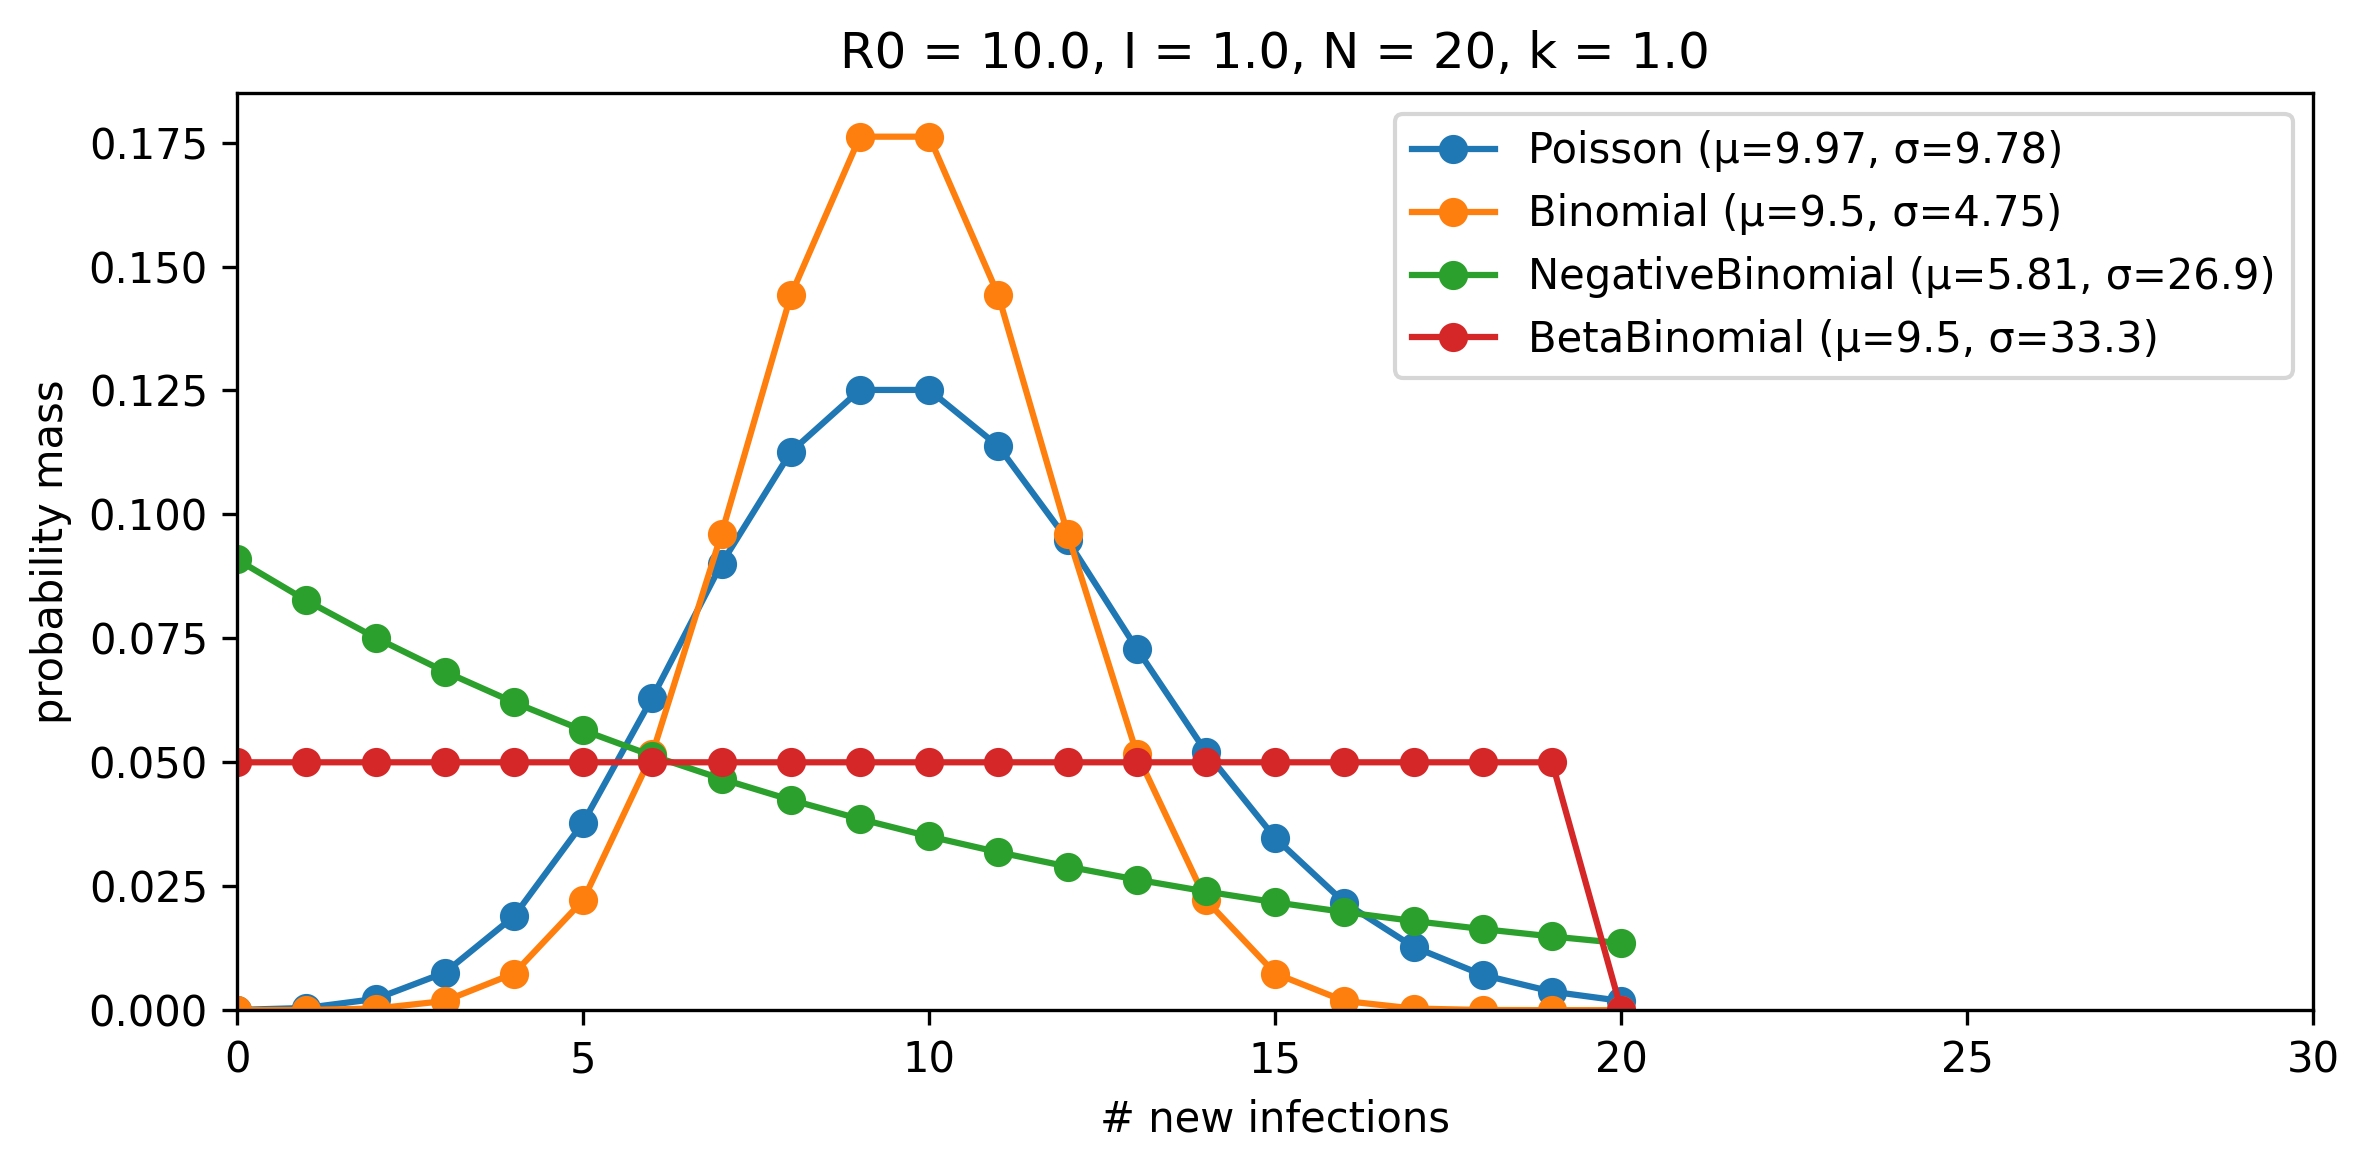

In [3]:
plot(R0=10., I=1., N=20, k=1.)

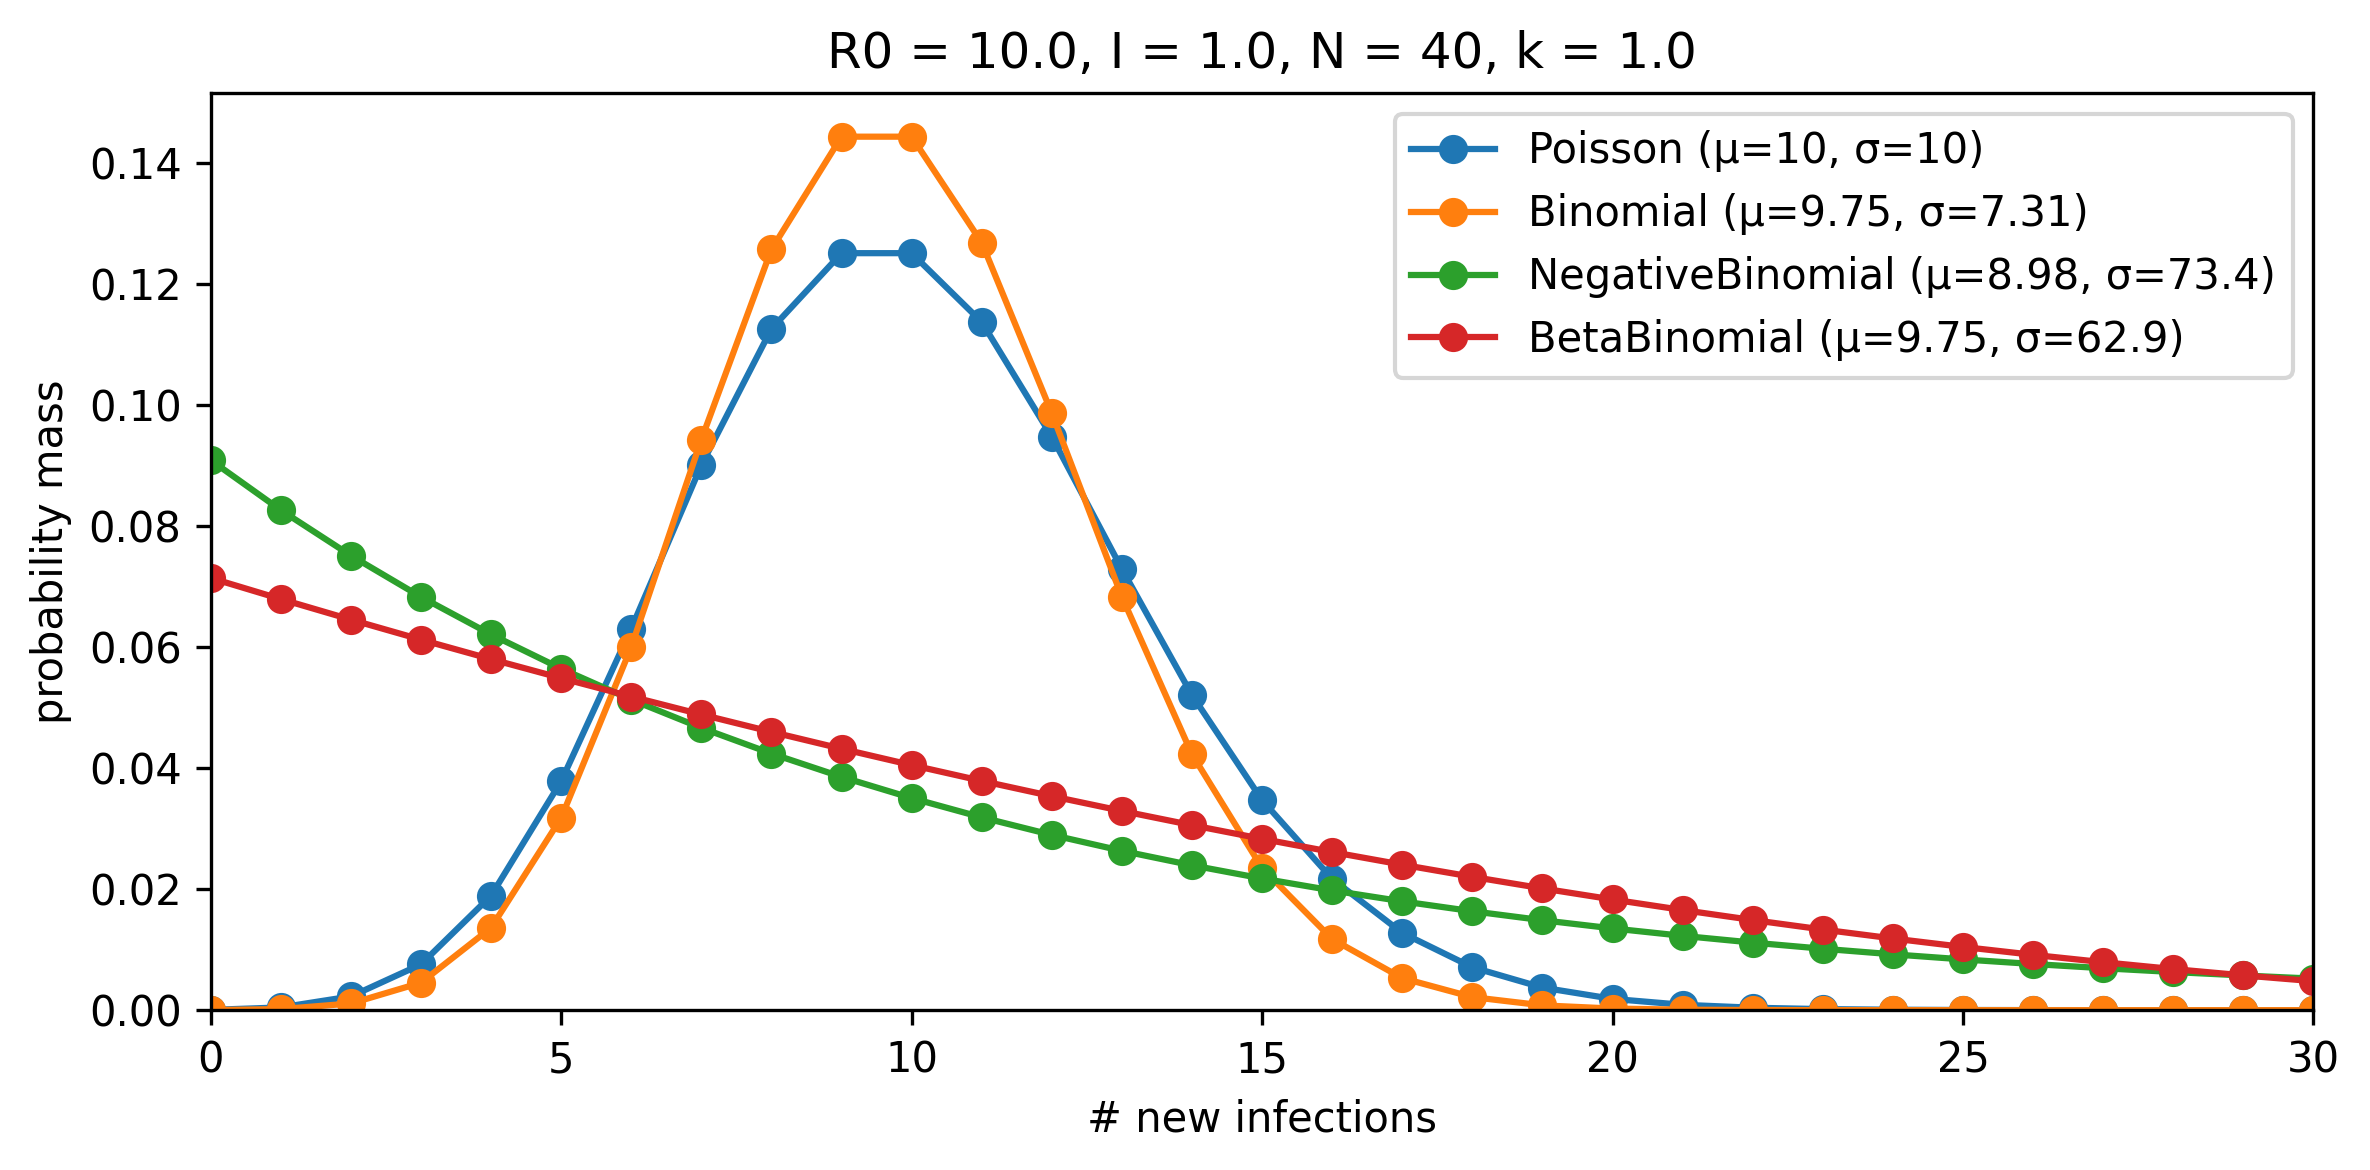

In [4]:
plot(R0=10., I=1., N=40, k=1.)

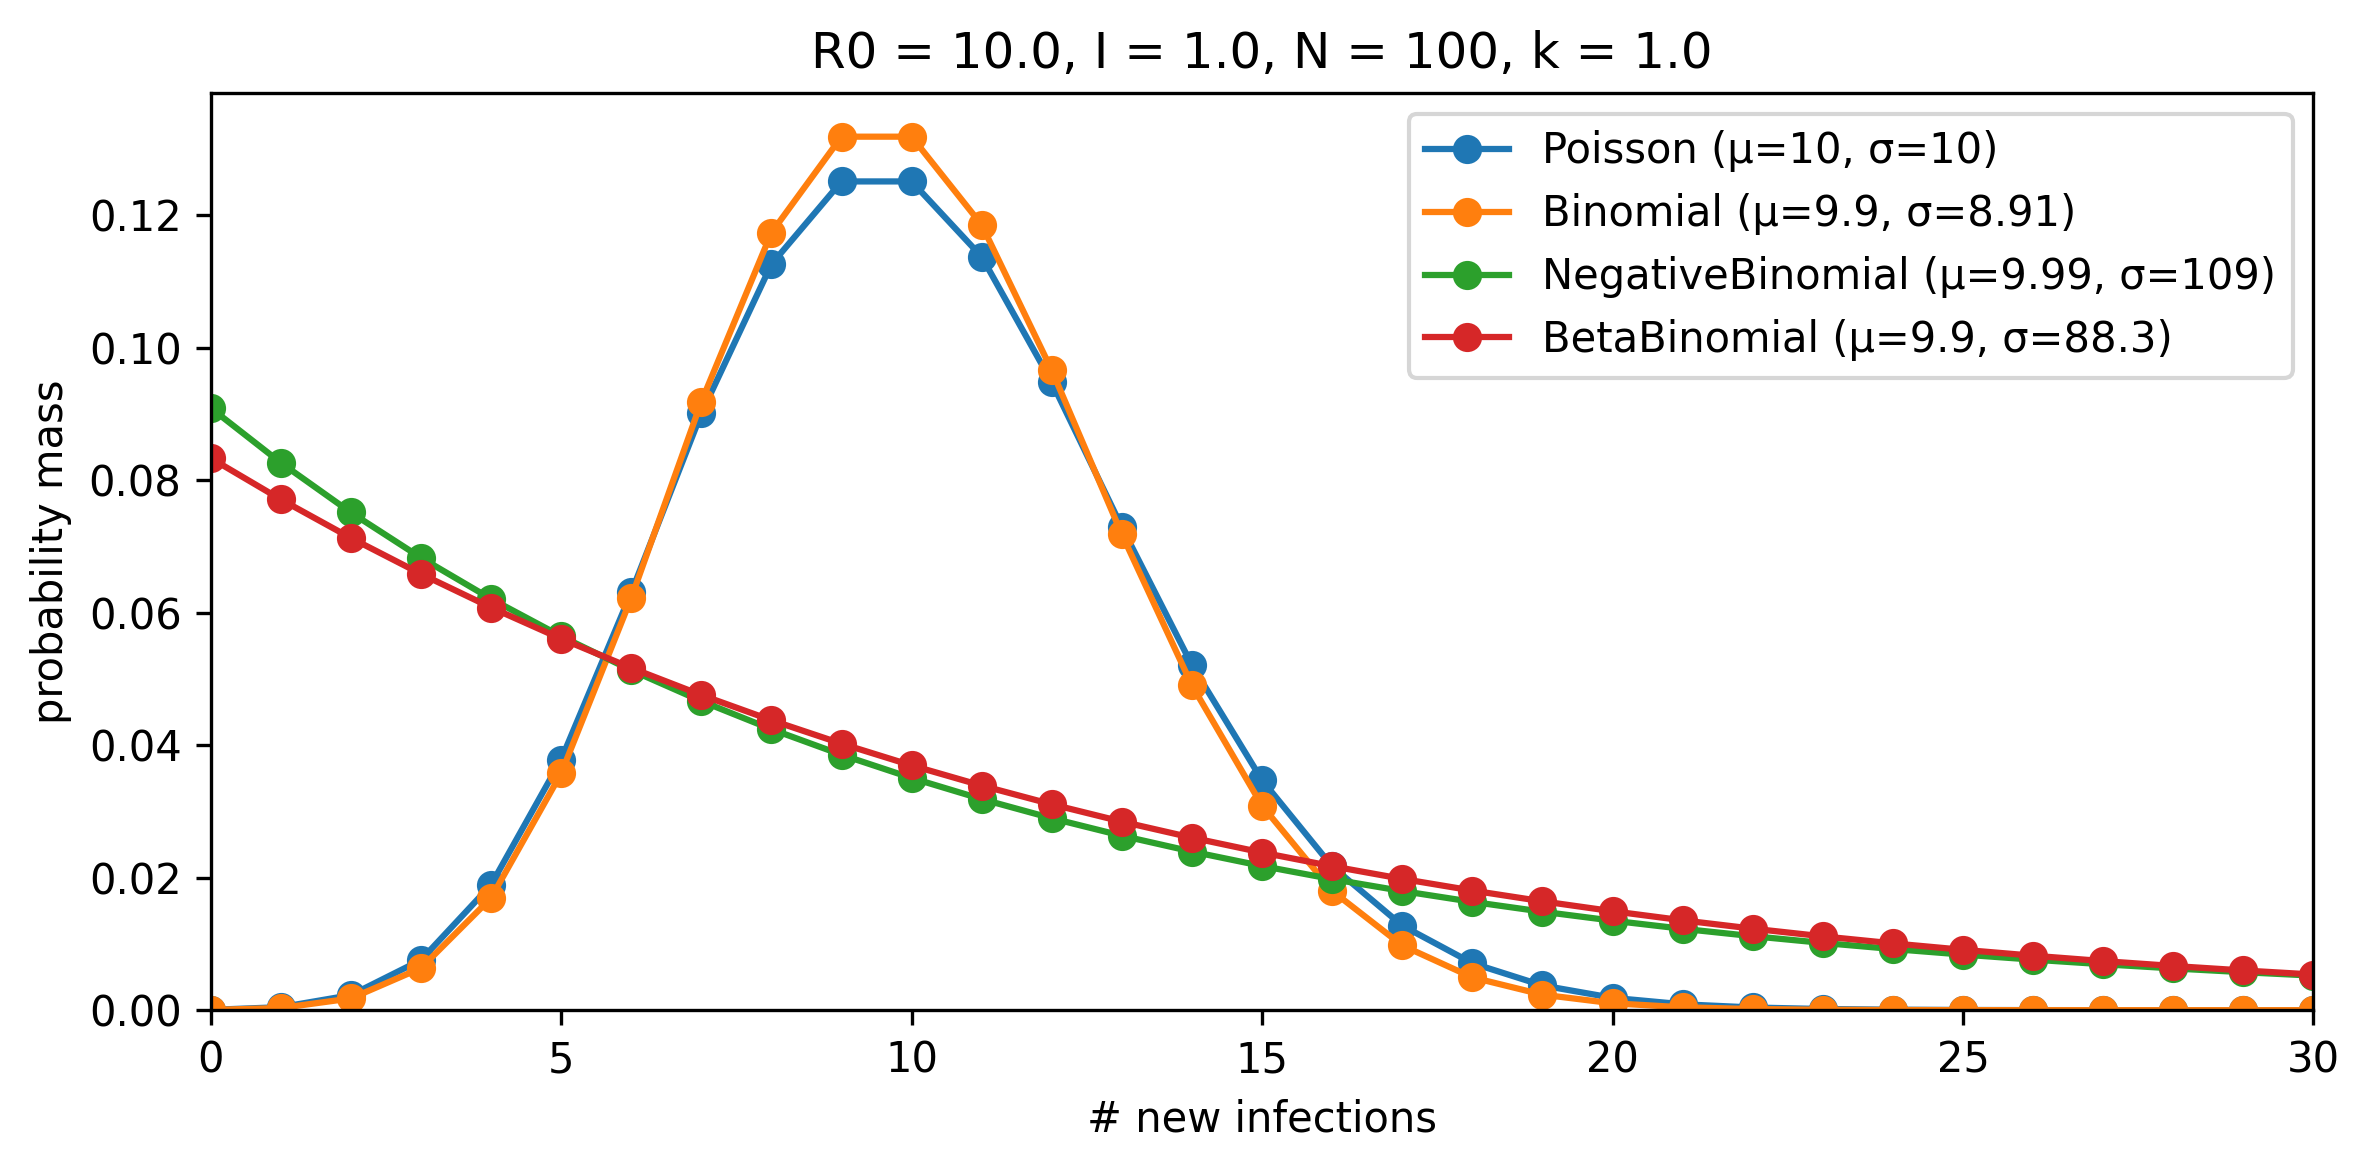

In [5]:
plot(R0=10., I=1., N=100, k=1.)

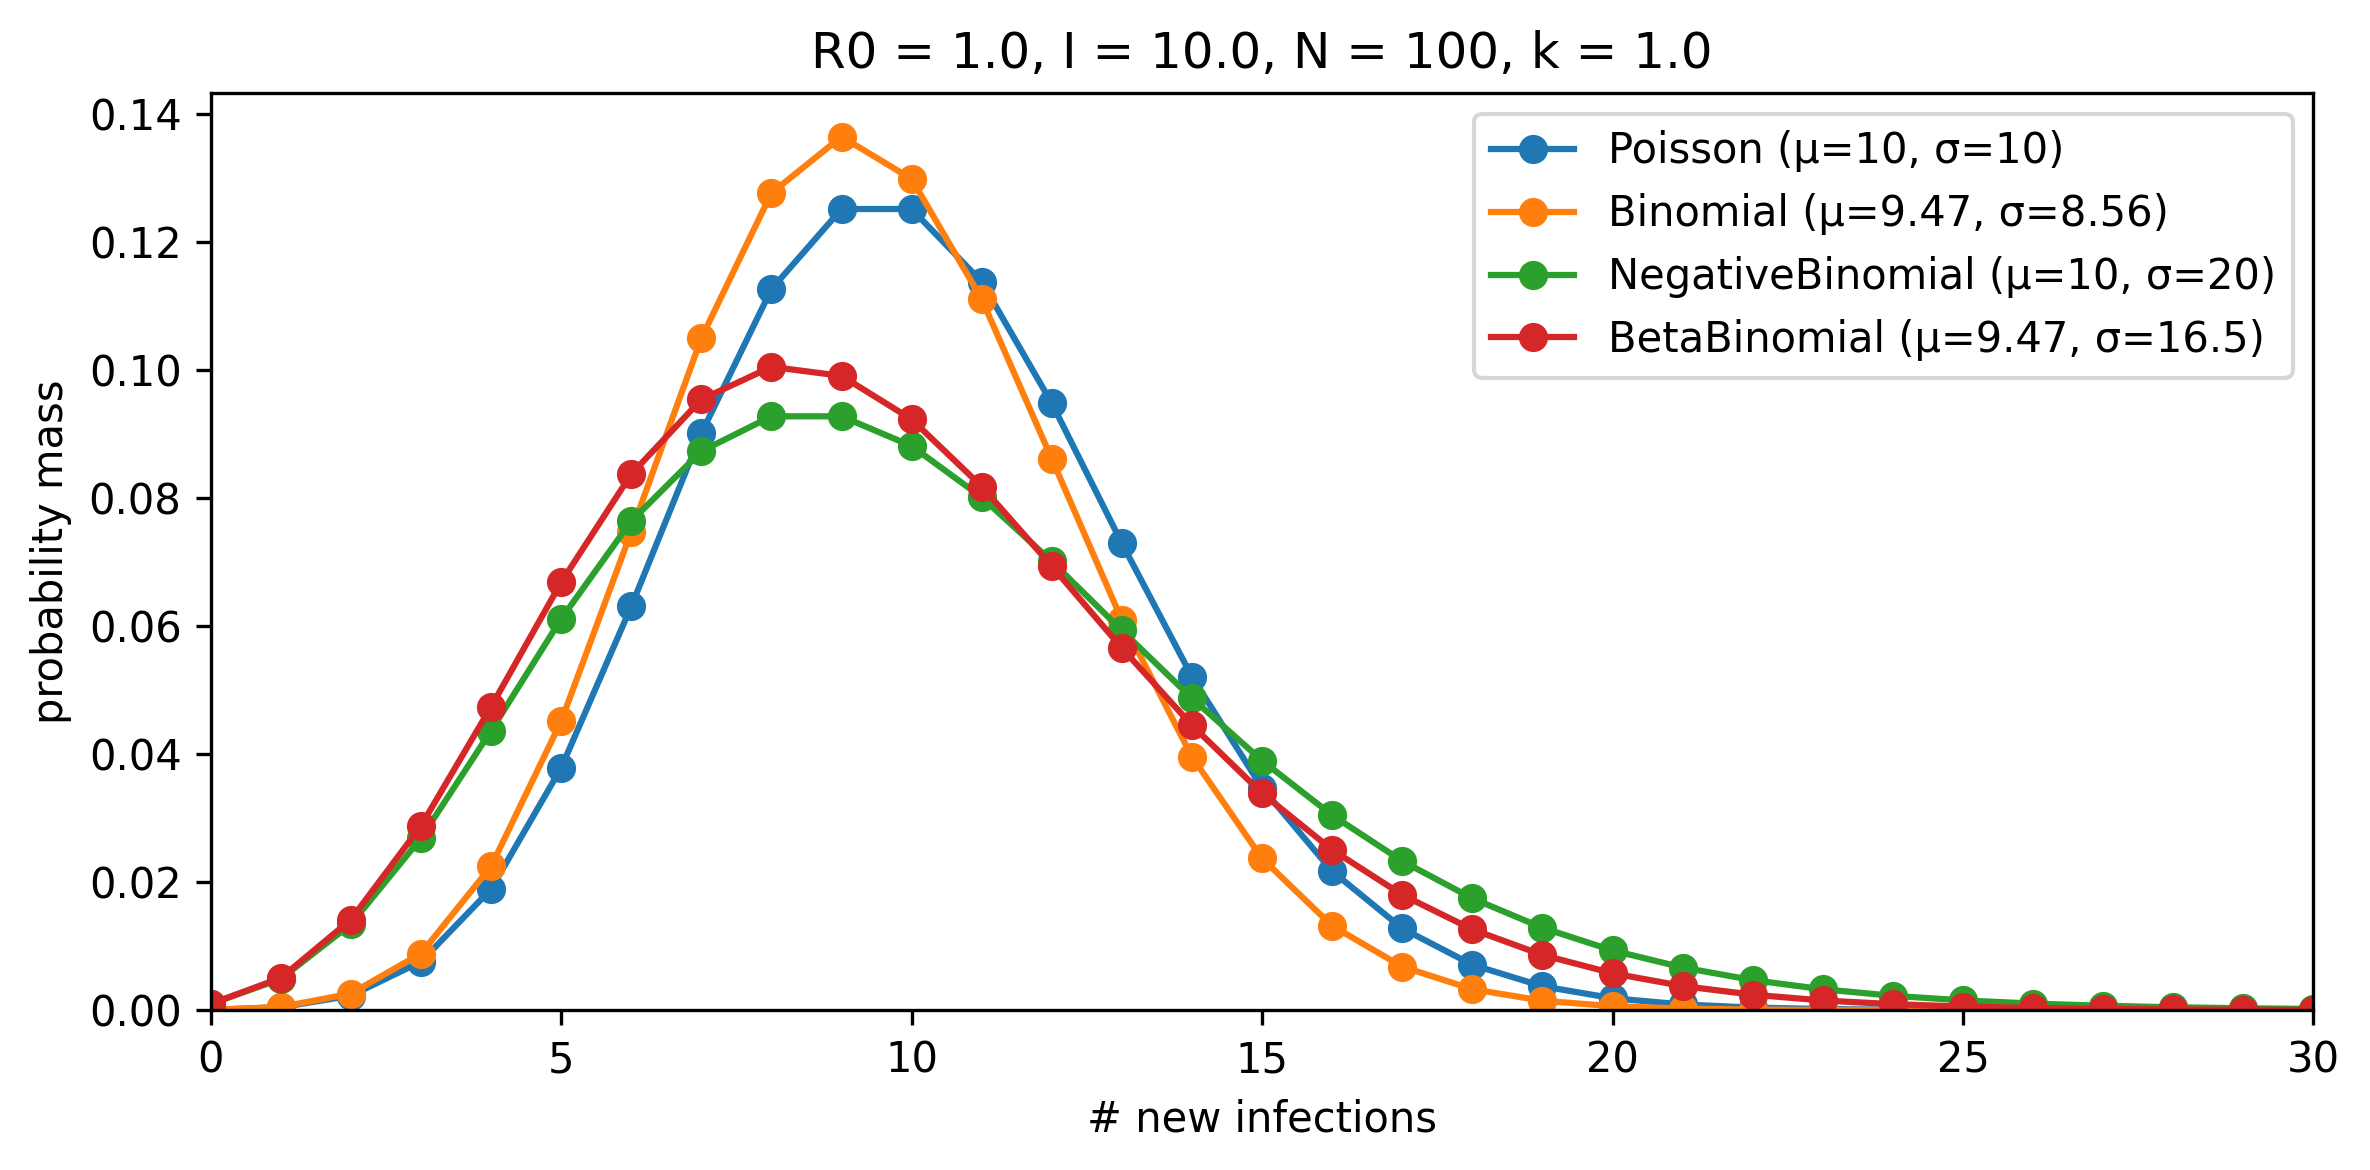

In [6]:
plot(R0=1., I=10., N=100, k=1.)

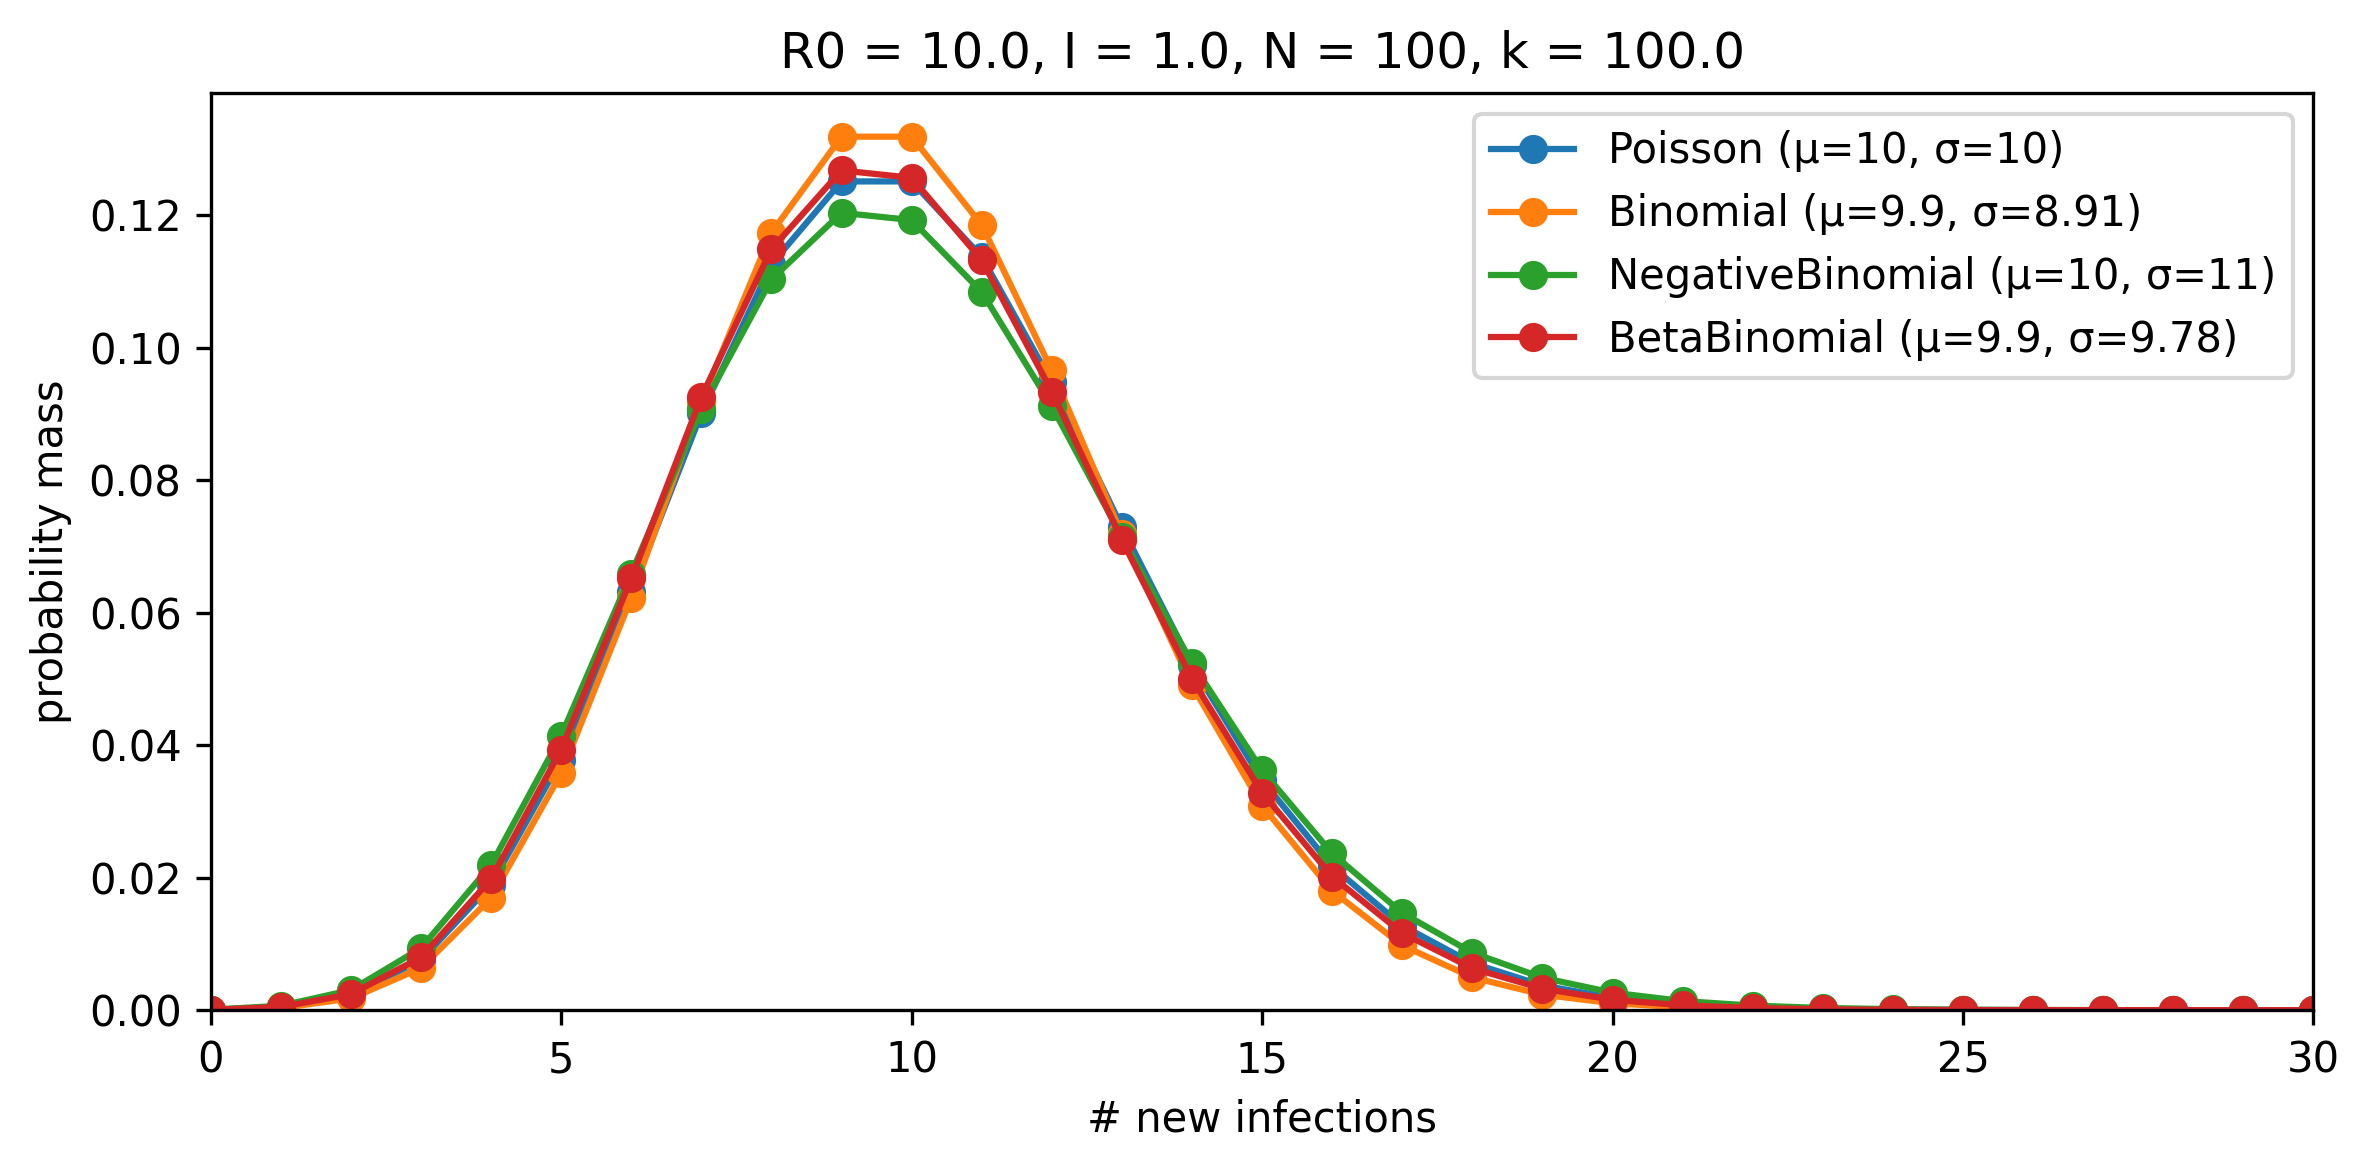

In [7]:
plot(R0=10., I=1., N=100, k=100.)

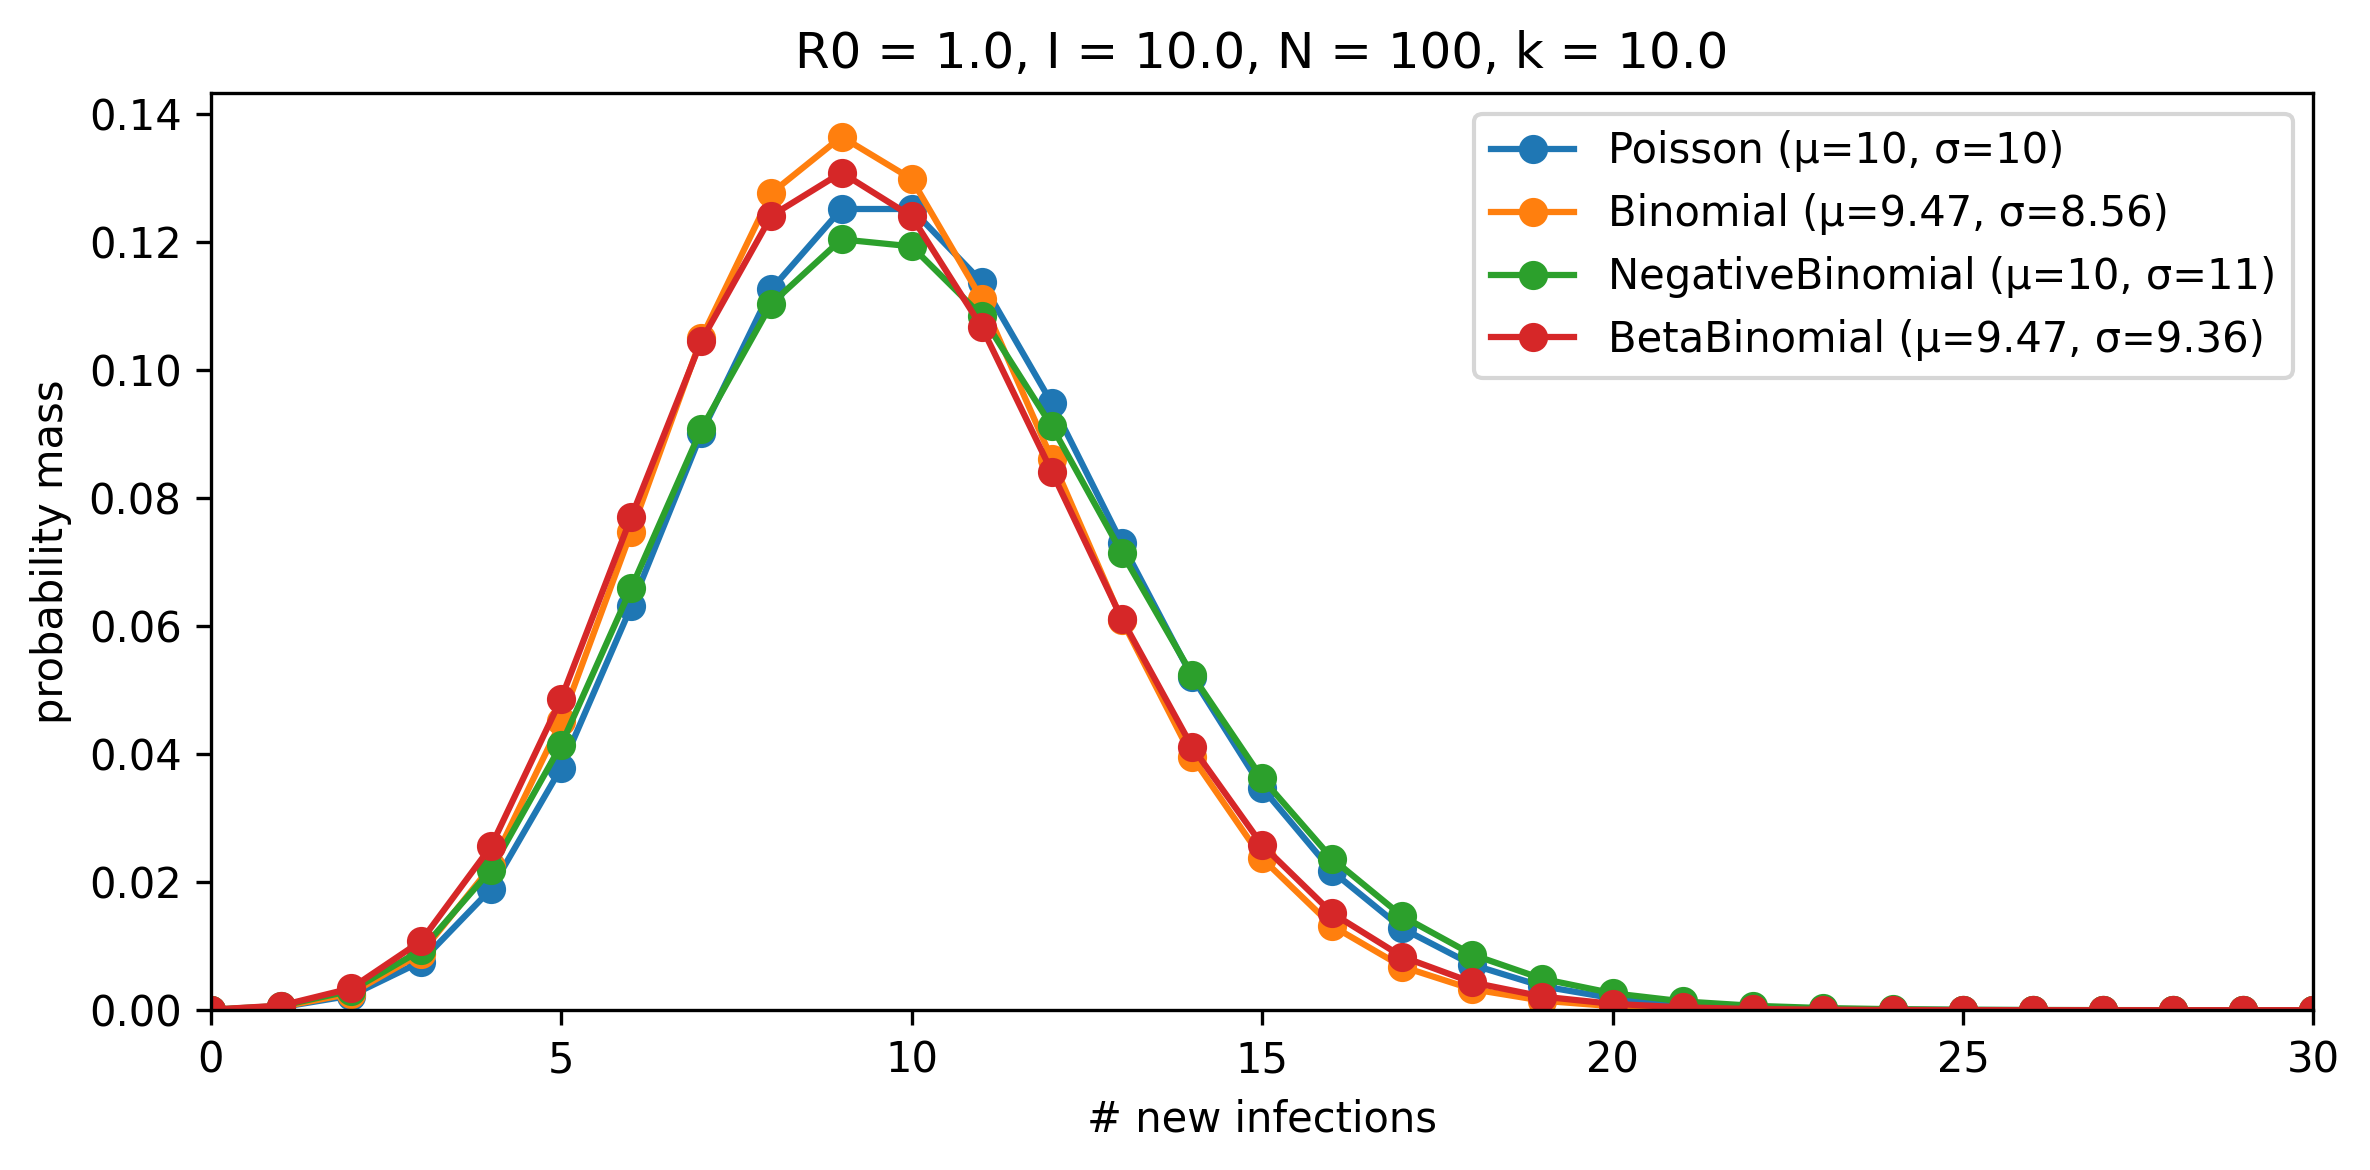

In [8]:
plot(R0=1., I=10., N=100, k=10.)